In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import ast
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Original CSV dataset
data = pd.read_csv("../Resources/data/tmdb_data.csv")

# Aditional Features
data = pd.merge(data, pd.read_csv('../Resources/data/tmdb_AdditionalFeatures.csv'), how='left', on=['imdb_id'])

print(data.shape)
data.head(5)

(3000, 26)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


In [3]:
pd.DataFrame(data.skew().sort_values(ascending=False)).head(10)

,0
popularity,14.377407
revenue,4.542285
totalVotes,4.189146
budget,3.103530
popularity2,1.952750
runtime,1.017619
id,0.000000
rating,-0.489699


## **Data Exploration**

In [4]:
data_explore = data.copy()

In [5]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
data_explore.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [7]:
data_explore['sequel'] = data_explore['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

In [8]:
# Function to extract the year, month and day on which movie is release. Date format is mm/dd/YY. 
def modify_date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<20:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
data_explore['release_date']=data_explore['release_date'].apply(lambda x: modify_date(x))
data_explore['release_year'] = pd.DatetimeIndex(data_explore['release_date']).year
data_explore['release_month'] = pd.DatetimeIndex(data_explore['release_date']).month
data_explore['release_day'] = pd.DatetimeIndex(data_explore['release_date']).day
data_explore['release_dayofweek'] = pd.DatetimeIndex(data_explore['release_date']).dayofweek

In [9]:
nan_cols = data_explore.isna().sum()
nan_cols[nan_cols>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [10]:
data_explore.describe()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,2882.000000,2882.000000,2882.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,8.029303,6.366308,933.938584,0.201333,1999.713000,6.775333,15.046333,3.269333
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,4.959153,0.887465,1795.101380,0.401063,15.423313,3.409115,8.632981,1.306150
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.600000,1.000000,1.000000,0.000000,1921.000000,1.000000,1.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,5.046250,5.800000,82.000000,0.000000,1993.000000,4.000000,8.000000,2.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,7.503500,6.400000,292.500000,0.000000,2004.000000,7.000000,15.000000,4.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,9.987000,7.000000,900.500000,0.000000,2011.000000,10.000000,22.000000,4.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,45.153000,9.000000,18931.000000,1.000000,2017.000000,12.000000,31.000000,6.000000


In [11]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [12]:
na_cols = data_explore.columns[data_explore.isna().any()].tolist()
na_cols.remove('overview')
na_cols.remove('runtime')
na_cols.remove('popularity2')
na_cols.remove('rating')
na_cols.remove('totalVotes')
data_explore['runtime'].fillna(value=data_explore['runtime'].median(), inplace=True)
data_explore['overview'].fillna(value='', inplace=True)
data_explore['popularity2'].fillna(value=0, inplace=True)
data_explore['rating'].fillna(value=0, inplace=True)
data_explore['totalVotes'].fillna(value=0, inplace=True)
for col in na_cols:
    data_explore[col].fillna(value='', inplace=True)

## **Top Keywords in Movies**

In [13]:
from wordcloud import WordCloud
from collections import Counter

In [14]:
for i, e in enumerate(data_explore['Keywords'][:2]):
    print(i,e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]


In [15]:
list_keywords = list(data_explore['Keywords'].apply(lambda x: [i['name'] for i in x] if x!= {} else []))
Counter(i for j in list_keywords for i in j).most_common(10)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73)]

In [16]:
top_keywords = [m[0] for m in Counter(i for j in list_keywords for i in j).most_common(10)]
data_explore['num_of_keywords'] = data_explore['Keywords'].apply(lambda x: len(x) if x!={} else 0)

data_explore['all_keywords'] = data_explore['Keywords'].apply(lambda x: ' '.join(sorted([i['name']for i in x]))
                                               if x!= {} else '')
for k in top_keywords:
    data_explore['keyword_'+ k] = data_explore['all_keywords'].apply(lambda x: 1 if k in x else 0)

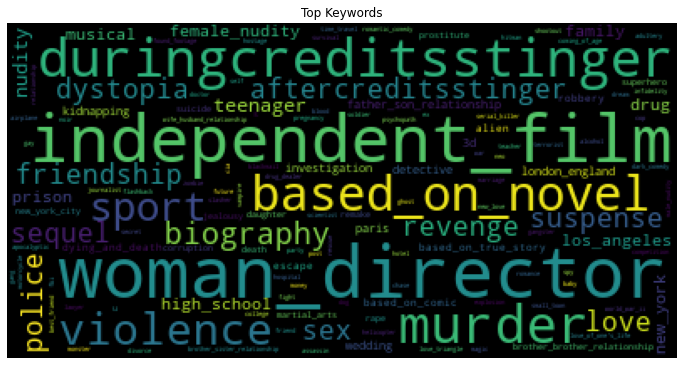

In [17]:
plt.figure(figsize=(12,10))
text3 = ' '.join(['_'.join(i.split(' ')) for j in list_keywords for i in j])
wordcloud3 = WordCloud(collocations = False).generate(text3)
plt.imshow(wordcloud3)
plt.title('Top Keywords')
plt.axis('off')
plt.show()

## **Most Common Spoken Languages released for Movies**

In [18]:
from wordcloud import WordCloud
from collections import Counter

In [19]:
for i, e in enumerate(data_explore['spoken_languages'][:2]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]


In [20]:
print('Number of Languages Movies released in:')
data_explore['spoken_languages'].apply(lambda x: len(x) if x!={} else 0).value_counts()

Number of Languages Movies released in:


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [21]:
list_of_language = list(data_explore['spoken_languages'].apply(lambda x: [i['name'] for i in x]
                                                    if x!= {} else []))
top_language = [m[0] for m in Counter(i for j in list_of_language for i in j).most_common(5)]
Counter(i for j in list_of_language for i in j).most_common(5)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152)]

In [22]:
data_explore['num_of_languages'] = data_explore['spoken_languages'].apply(lambda x: len(x) if x!= {} else 0)

data_explore['all_languages'] = data_explore['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name']for i in x]))
                                                    if x!= {} else '')

for l in top_language:
    data_explore['language_' + l] = data_explore['all_languages'].apply(lambda x: 1 if l in x else 0)

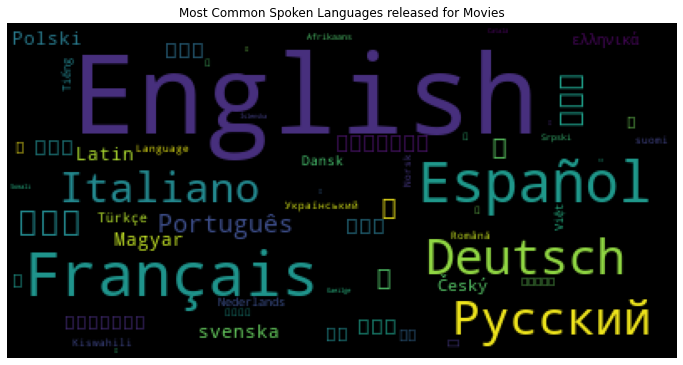

In [23]:
plt.figure(figsize=(12,8))
text2 = ' '.join(i for j in list_of_language for i in j)
wordcloud2 = WordCloud(collocations=False).generate(text2)
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Most Common Spoken Languages released for Movies')
plt.show()

## **Director Gender**

In [24]:
gender_df = pd.DataFrame([data_explore.imdb_id, data_explore.crew]).transpose()
gender_df = gender_df.rename(columns={'crew': 'director_gender'})
gender_df.head()

,imdb_id,director_gender
0,tt2637294,"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,tt0368933,"[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,tt2582802,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,tt1821480,"[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,tt1380152,"[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [25]:
dict_columns = ['director_gender']
# for column in dict_columns:
#     gender_df[column] = gender_df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [26]:
def get_gender(x, column):
    gender = []
    for item in x:
        if col=='director_gender':
            if item['job']=='Director' 'gender'==1:
                gender.append(item['gender'])
        elif col=='director_gender':
            if item['job']=='Director' 'gender'==2:
                gender.append(item['gender'])
        else:
            gender.append(item['gender'])
        return gender

In [27]:
gender_df.head()

,imdb_id,director_gender
0,tt2637294,"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,tt0368933,"[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,tt2582802,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,tt1821480,"[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,tt1380152,"[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [28]:
gender =[]
for item in gender_df['director_gender']:
    for j in item:
#         print(j)
        if j['job'] == 'Director':
            print(j['gender'],j['job'])
            gender.append(j['gender'])

2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
0 Director
1 Director
0 Director
2 Director
2 Director
0 Director
0 Director
0 Director
1 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
1 Director
0 Director
0 Director
0 Director
2 Director
0 Director
0 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
1 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director

2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
1 Director
1 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
2 Director

0 Director
0 Director
0 Director
0 Director
1 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
1 Director
2 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
1 Director
2 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
0 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director

2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
1 Director
1 Director
0 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
1 Director
0 Director
2 Director

In [29]:
# Fetch the name field from each JSON object. Extract the Director from Crew only and extract first 3 main cast members from the cast field (main roles from movie)
def get_names(x, col):
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director':
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names

    
for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: get_names(x, col))

In [30]:
data_explore.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek,num_of_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,num_of_languages,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,10.400,5.0,482.0,1,2015,2,20,4,4,duringcreditsstinger hot tub sequel time travel,0,0,1,0,0,0,0,0,0,0,1,English,1,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,15.229,6.4,1528.0,1,2004,8,6,4,4,coronation duty falling in love marriage,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/2014,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,26.082,8.4,7314.0,0,2014,10,10,4,12,conservatory drummer jazz jazz band montage mu...,0,0,0,0,0,1,0,0,0,0,1,English,1,0,0,0,0
3,4,,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/2012,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],16000000,5.531,7.5,115.0,0,2012,3,9,4,7,bollywood crime india missing husband mystery ...,0,0,0,0,0,0,0,0,0,0,2,English हिन्दी,1,0,0,0,0
4,5,,0,"[Action, Thriller]",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/2009,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]",[Jong-seok Yoon],3923970,0.000,0.0,0.0,0,2009,2,5,3,0,,0,0,0,0,0,0,0,0,0,0,1,한국어/조선말,0,0,0,0,0


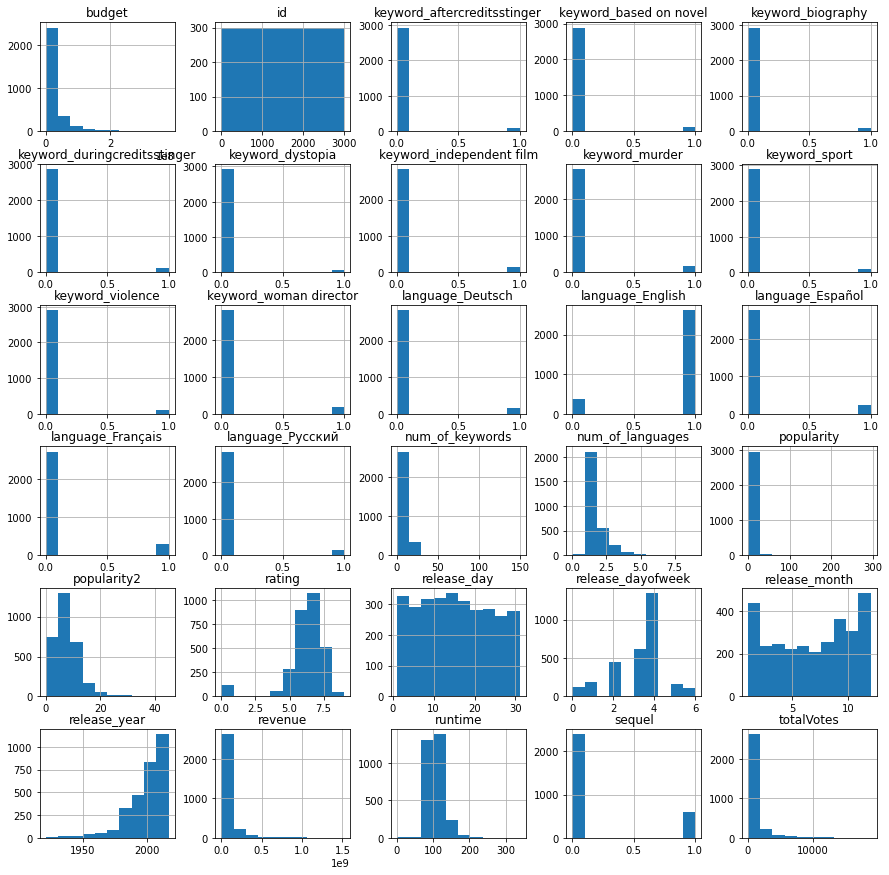

In [31]:
data_explore.hist(figsize=(15, 15))
plt.show()

## **Top 10 Most Popular Movies**

In [32]:
most_popular = data_explore.sort_values('popularity', ascending=False).head(10)
most_popular['revenue(million)'] = most_popular['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular['budget(million)'] = most_popular['budget'].apply(lambda x : x//1000000)    # budget in millions
most_popular[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,40.447,7.3,11614.0,[],[],149,820
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
1695,"[Action, Crime]",Baby Driver,"[Big Talk Productions, TriStar Pictures, Media...",228.032744,19.248,7.4,7325.0,"[Ansel Elgort, Lily James, Kevin Spacey]",[Edgar Wright],34,224
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,31.708,7.5,18931.0,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,39.214,7.7,11217.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,39.667,7.9,9623.0,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
1715,"[Drama, Science Fiction, War]",War for the Planet of the Apes,[Chernin Entertainment],146.161786,29.360,7.0,4931.0,"[Andy Serkis, Woody Harrelson, Steve Zahn]",[Matt Reeves],152,369
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2293,"[Drama, Thriller, Science Fiction]",The Circle,"[Likely Story, Playtone, Image Nation]",88.439243,11.626,5.5,2511.0,"[Emma Watson, Tom Hanks, John Boyega]",[James Ponsoldt],18,20


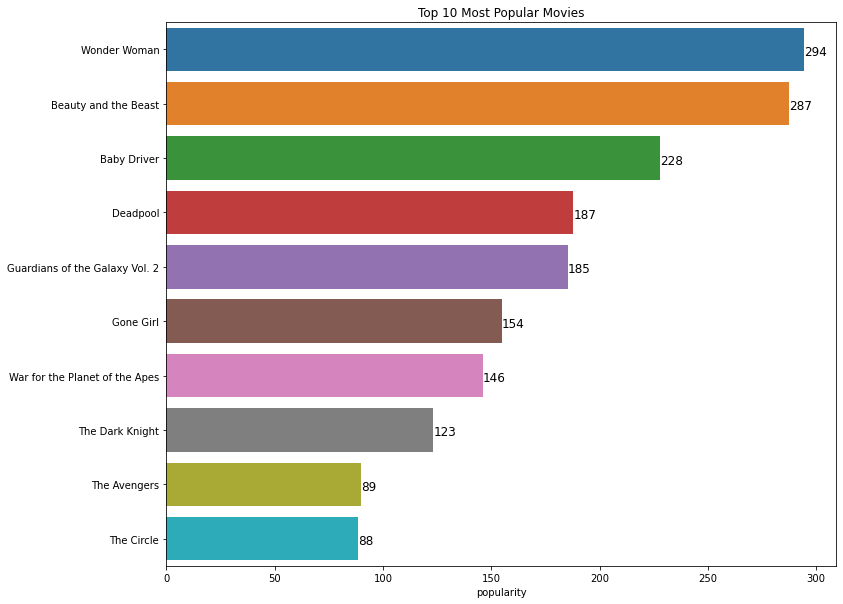

In [33]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='popularity', data=most_popular, order=most_popular.sort_values('popularity', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

In [34]:
most_popular2 = data_explore.sort_values('popularity2', ascending=False).head(10)
most_popular2['revenue(million)'] = most_popular2['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular2['budget(million)'] = most_popular2['budget'].apply(lambda x : x//1000000)    # budget in millions
most_popular2[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
114,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Fellowship of the Ring,"[WingNut Films, New Line Cinema, The Saul Zaen...",32.070725,43.951,8.3,13552.0,"[Elijah Wood, Ian McKellen, Cate Blanchett]",[Peter Jackson],93,871
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,40.447,7.3,11614.0,[],[],149,820
2802,"[Adventure, Fantasy, Family]",Harry Potter and the Chamber of Secrets,"[1492 Pictures, Heyday films, Warner Bros.]",29.741452,40.269,7.7,10853.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[Chris Columbus],100,876
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,39.667,7.9,9623.0,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,39.214,7.7,11217.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
286,"[Horror, Thriller]",Split,"[Universal Pictures, Blumhouse Productions, Bl...",28.920839,38.559,7.2,9418.0,"[James McAvoy, Anya Taylor-Joy, Betty Buckley]",[M. Night Shyamalan],9,276
2018,"[Action, Science Fiction, Adventure]",Guardians of the Galaxy,"[Marvel Studios, Moving Picture Company (MPC),...",53.291601,37.952,7.9,16508.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],170,773
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1341,"[Drama, Romance]",The Vow,"[Spyglass Entertainment, Screen Gems]",9.524298,33.271,7.1,2241.0,"[Rachel McAdams, Channing Tatum, Sam Neill]",[Michael Sucsy],30,196


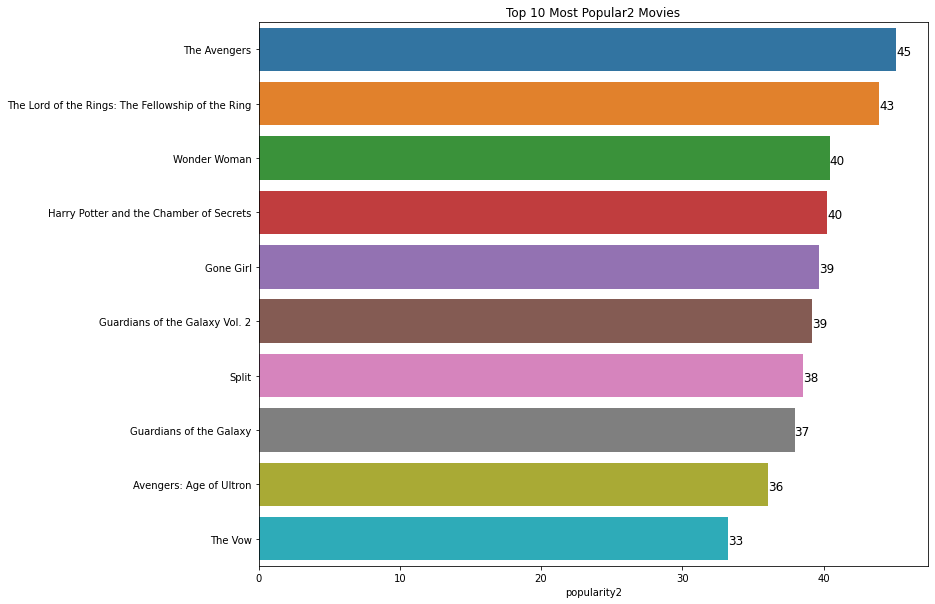

In [35]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='popularity2', data=most_popular2, order=most_popular2.sort_values('popularity2', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Popular2 Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Most Voted Movies**

In [36]:
most_votes = data_explore.sort_values('totalVotes', ascending=False).head(10)
most_votes['revenue(million)'] = most_votes['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_votes['budget(million)'] = most_votes['budget'].apply(lambda x : x//1000000)    # budget in millions
most_votes[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,31.708,7.5,18931.0,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
2018,"[Action, Science Fiction, Adventure]",Guardians of the Galaxy,"[Marvel Studios, Moving Picture Company (MPC),...",53.291601,37.952,7.9,16508.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],170,773
2338,[Drama],Fight Club,"[Twentieth Century Fox Film Corporation, Regen...",63.869599,32.799,8.4,15256.0,"[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher],63,100
837,"[Action, Adventure, Science Fiction, Thriller]",Mad Max: Fury Road,"[Village Roadshow Pictures, Kennedy Miller Pro...",29.361780,24.647,7.4,13685.0,"[Tom Hardy, Charlize Theron, Nicholas Hoult]",[George Miller],150,378
114,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Fellowship of the Ring,"[WingNut Films, New Line Cinema, The Saul Zaen...",32.070725,43.951,8.3,13552.0,"[Elijah Wood, Ian McKellen, Cate Blanchett]",[Peter Jackson],93,871
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2016,"[Drama, Crime]",The Shawshank Redemption,"[Castle Rock Entertainment, Warner Bros.]",51.645403,30.102,8.6,12215.0,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],25,28
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405


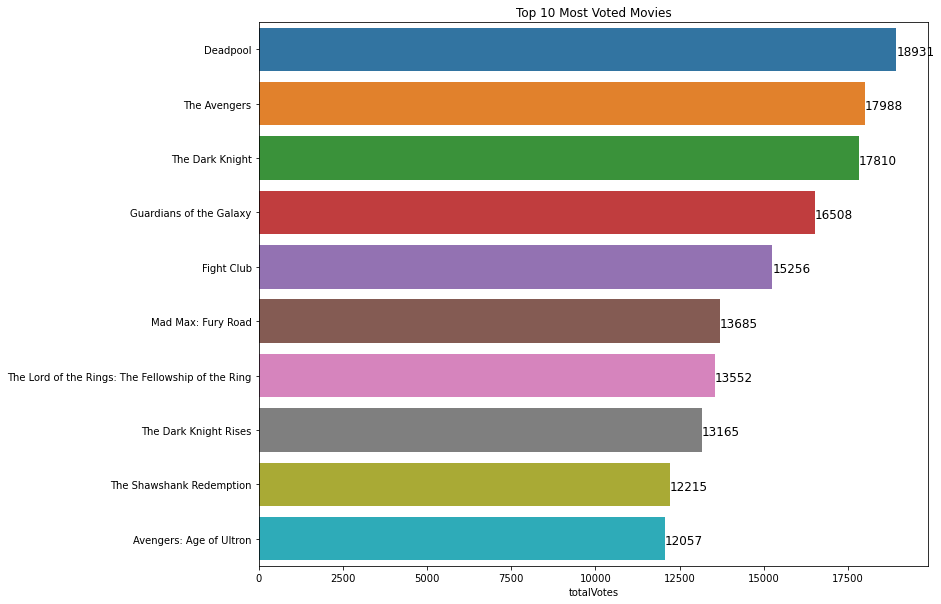

In [37]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='totalVotes', data=most_votes, order=most_votes.sort_values('totalVotes', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Voted Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Rated Movies**

In [38]:
highest_rating = data_explore.sort_values('rating', ascending=False).head(10)
highest_rating['revenue(million)'] = highest_rating['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_rating['budget(million)'] = highest_rating['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_rating[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
586,[Music],Katyar Kaljat Ghusali,[],0.446454,0.674,9.0,2.0,[Shankar Mahadevan],[Subodh Bhave],1,4
2946,"[Drama, Comedy, Romance]",My Best Girl,[Mary Pickford Company],0.205671,1.247,8.8,4.0,"[Mary Pickford, Charles 'Buddy' Rogers, Sunshi...",[Sam Taylor],0,1
2016,"[Drama, Crime]",The Shawshank Redemption,"[Castle Rock Entertainment, Warner Bros.]",51.645403,30.102,8.6,12215.0,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],25,28
1093,"[Drama, Crime]",The Godfather,"[Paramount Pictures, Alfran Productions]",41.109264,24.786,8.6,9368.0,"[Marlon Brando, Al Pacino, James Caan]",[Francis Ford Coppola],6,245
2795,"[Drama, History]",The Visual Bible: The Gospel of John,"[Gospel of John Ltd., Toronto Film Studios, Vi...",1.551648,1.573,8.6,17.0,"[Christopher Plummer, Henry Ian Cusick, Stuart...",[Philip Saville],10,4
2721,"[Drama, Comedy]",There Goes My Baby,[Nelson Entertainment],0.377787,1.160,8.5,2.0,"[Dermot Mulroney, Ricky Schroder, Kelli Williams]",[Floyd Mutrux],10,0
2652,[Comedy],The Great Dictator,"[United Artists, Roy Export Company Establishm...",9.241748,10.793,8.4,1345.0,"[Charlie Chaplin, Jack Oakie, Reginald Gardiner]",[Charlie Chaplin],2,11
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
2338,[Drama],Fight Club,"[Twentieth Century Fox Film Corporation, Regen...",63.869599,32.799,8.4,15256.0,"[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher],63,100
2765,"[Drama, Romance]",Cinema Paradiso,[Rai Tre Radiotelevisione Italiana],14.177005,10.515,8.4,1591.0,"[Philippe Noiret, Jacques Perrin, Marco Leonardi]",[Giuseppe Tornatore],0,11


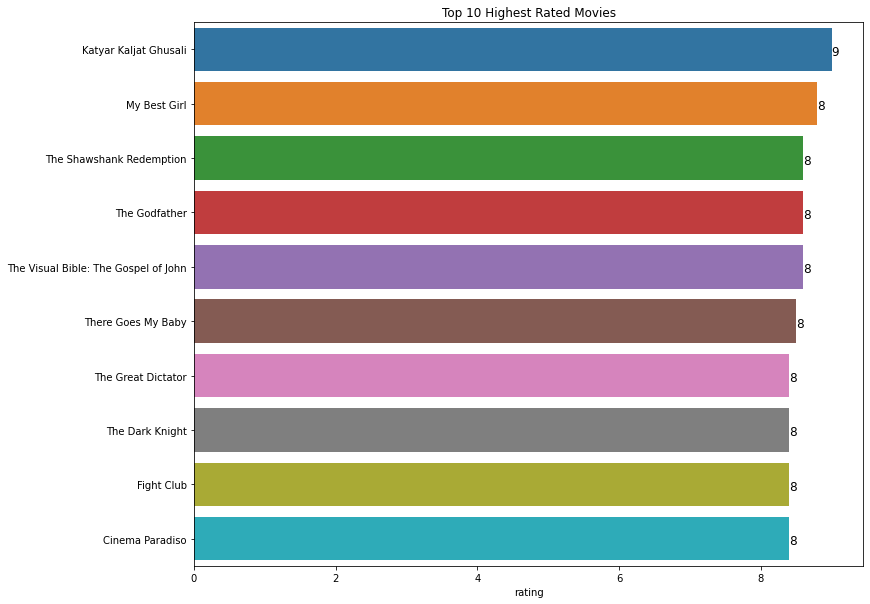

In [39]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='rating', data=highest_rating, order=highest_rating.sort_values('rating', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Rated Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Revenue Movies**

In [40]:
highest_revenue = data_explore.sort_values('revenue', ascending=False).head(10)
highest_revenue['revenue(million)'] = highest_revenue['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue['budget(million)'] = highest_revenue['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_revenue[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,23.527,7.3,6178.0,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,3.699,6.1,4682.0,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,20.948,6.4,8040.0,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,15.535,7.0,7349.0,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028
881,"[Family, Fantasy, Adventure]",Alice in Wonderland,"[Walt Disney Pictures, Team Todd, Tim Burton P...",17.285093,17.123,6.5,8056.0,"[Mia Wasikowska, Johnny Depp, Anne Hathaway]",[Tim Burton],200,1025
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,31.637,7.7,9349.0,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023


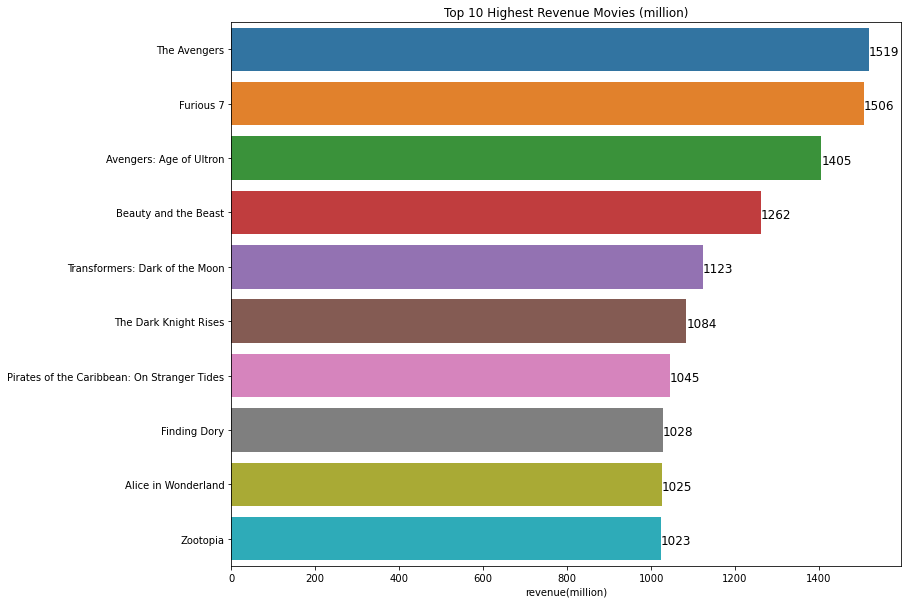

In [41]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='revenue(million)', data=highest_revenue, order=highest_revenue.sort_values('revenue(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Revenue Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Budgeted Movies**

In [42]:
highest_budget = data_explore.sort_values('budget', ascending=False).head(10)
highest_budget['revenue(million)'] = highest_budget['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget['budget(million)'] = highest_budget['budget'].apply(lambda x : x//1000000)    # budgest in millions
highest_budget[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,20.948,6.4,8040.0,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2209,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",31.363664,23.290,7.1,7788.0,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300,961
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1425,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ...",13.284712,14.746,5.5,2194.0,"[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],270,391
1270,"[Action, Adventure, Science Fiction]",John Carter,[Walt Disney Pictures],14.670353,12.593,6.1,3132.0,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260,284
1630,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,"[Paramount Pictures, Di Bonaventura Pictures, ...",39.186819,28.409,6.0,3026.0,"[Mark Wahlberg, Josh Duhamel, Laura Haddock]",[Michael Bay],260,604
2532,"[Adventure, Fantasy, Action]",The Hobbit: An Unexpected Journey,"[WingNut Films, New Line Cinema, Warner Bros. ...",23.253089,24.642,7.2,11498.0,"[Ian McKellen, Martin Freeman, Richard Armitage]",[Peter Jackson],250,1021
961,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince,"[Warner Bros., Heyday Films]",19.083723,29.714,7.6,9712.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[David Yates],250,933
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
666,"[Adventure, Fantasy]",The Hobbit: The Desolation of Smaug,"[WingNut Films, New Line Cinema, Warner Bros. ...",20.644776,18.718,7.6,7234.0,"[Martin Freeman, Ian McKellen, Richard Armitage]",[Peter Jackson],250,958


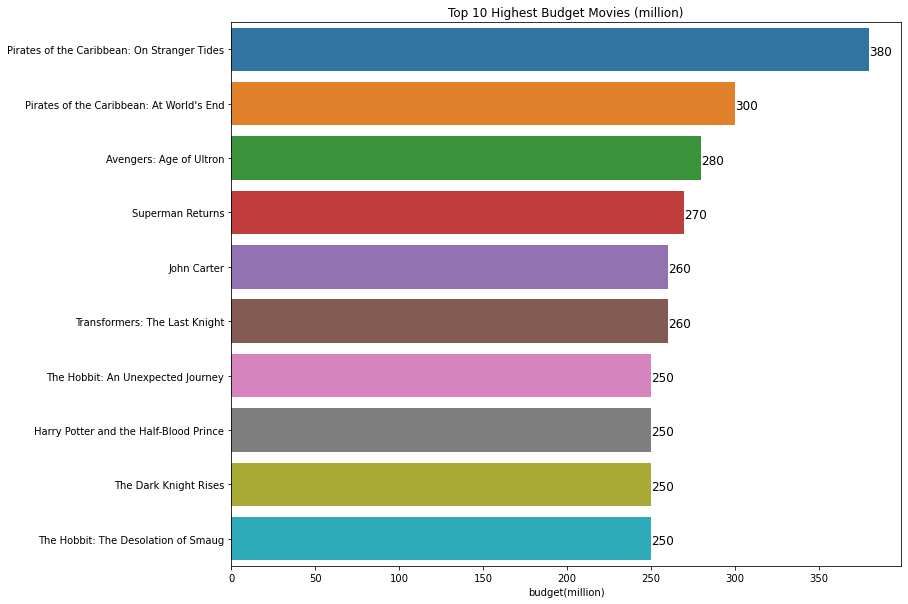

In [43]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='budget(million)', data=highest_budget, order=highest_budget.sort_values('budget(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Budget Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## **Top 10 Highest Gross Income Movies**

In [44]:
highest_profit = data_explore.copy()
highest_profit['revenue(million)'] = highest_profit['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_profit['budget(million)'] = highest_profit['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_profit['profit(million)'] = highest_profit['revenue(million)']-highest_profit['budget(million)']
highest_profit = highest_profit.sort_values('profit(million)', ascending=False).head(10)
highest_profit[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,23.527,7.3,6178.0,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,3.699,6.1,4682.0,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,31.637,7.7,9349.0,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023
1735,"[Adventure, Science Fiction]",Jurassic Park,"[Universal Pictures, Amblin Entertainment]",8.863776,13.347,7.8,8295.0,"[Sam Neill, Laura Dern, Jeff Goldblum]",[Steven Spielberg],63,920
543,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Two Towers,"[WingNut Films, New Line Cinema, The Saul Zaen...",29.423537,24.886,8.2,11696.0,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",[Peter Jackson],79,926
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,15.535,7.0,7349.0,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028


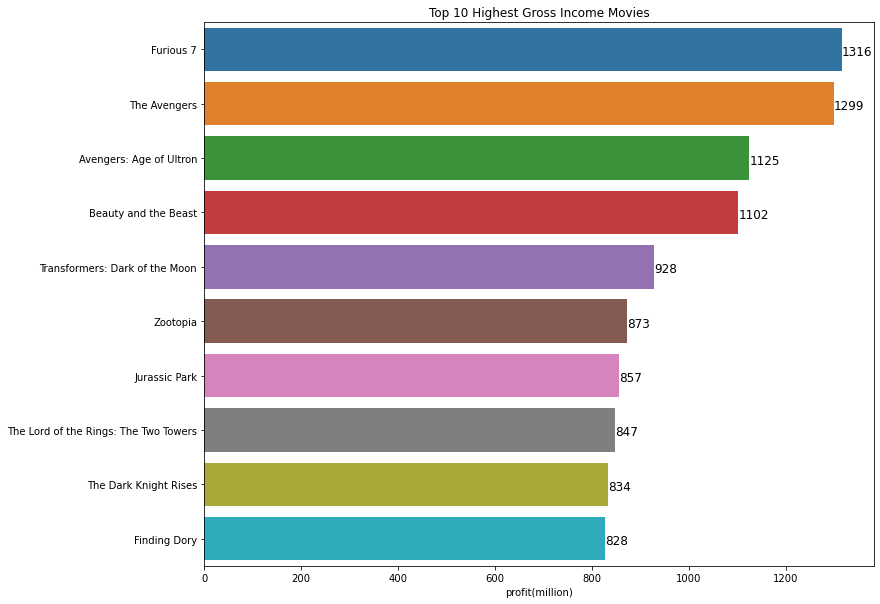

In [45]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='profit(million)', data=highest_profit, order=highest_profit.sort_values('profit(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Gross Income Movies', fontsize=12)
plt.ylabel('')
plt.show()

## **Genre**

In [46]:
data_explore_encode = data_explore['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data_explore_genres = pd.concat([data_explore, data_explore_encode], axis=1)
genres = data_explore_encode.columns
data_explore_genres.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek,num_of_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,num_of_languages,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,10.400,5.0,482.0,1,2015,2,20,4,4,duringcreditsstinger hot tub sequel time travel,0,0,1,0,0,0,0,0,0,0,1,English,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,15.229,6.4,1528.0,1,2004,8,6,4,4,coronation duty falling in love marriage,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/2014,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,26.082,8.4,7314.0,0,2014,10,10,4,12,conservatory drummer jazz jazz band montage mu...,0,0,0,0,0,1,0,0,0,0,1,English,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/2012,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],16000000,5.531,7.5,115.0,0,2012,3,9,4,7,bollywood crime india missing husband mystery ...,0,0,0,0,0,0,0,0,0,0,2,English हिन्दी,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,,0,"[Action, Thriller]",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/2009,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]",[Jong-seok Yoon],3923970,0.000,0.0,0.0,0,2009,2,5,3,0,,0,0,0,0,0,0,0,0,0,0,1,한국어/조선말,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
genres_info = []
for col in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity, median_popularity2, median_rating, median_totalVotes =0, 0, 0, 0, 0, 0, 0, 0, 0
    total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()
    total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()
    median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()
    total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()
    median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()
    median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()
    median_popularity2 = data_explore_genres[data_explore_genres[col]==1]['popularity2'].median()
    median_rating = data_explore_genres[data_explore_genres[col]==1]['rating'].median()
    median_totalVotes = data_explore_genres[data_explore_genres[col]==1]['totalVotes'].median()
    genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity,median_popularity2, median_rating, median_totalVotes])

In [48]:
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity','median_popularity2', 'median_rating', 'median_totalVotes'])
genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity','median_popularity2', 'median_rating', 'median_totalVotes']]

,genres,movies_count,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million),median_popularity,median_popularity2,median_rating,median_totalVotes
0,Comedy,1028,19614,8.0,62580,18.0,6.905488,7.0315,6.1,232.5
1,Drama,1531,25733,6.0,69516,11.0,6.793972,6.8820,6.6,206.0
2,Family,260,11048,24.0,36113,57.0,8.416440,7.8890,6.2,456.0
3,Romance,571,8944,5.0,30094,14.0,6.370105,6.5220,6.4,155.0
4,Thriller,789,20873,13.0,53917,21.0,8.371005,8.4160,6.2,425.0
5,Action,741,29934,20.0,82283,36.0,8.345985,8.3780,6.2,396.0
6,Animation,141,5967,23.0,20830,36.0,9.409701,8.5690,6.6,491.0
7,Adventure,439,23738,28.0,77180,59.0,9.961184,9.0370,6.3,600.0
8,Horror,301,4578,6.0,15865,17.0,8.122042,8.3110,5.9,330.0
9,Documentary,87,76,0.0,403,0.0,1.949044,2.4890,6.9,31.0


## **Total count of Movies per Genre**

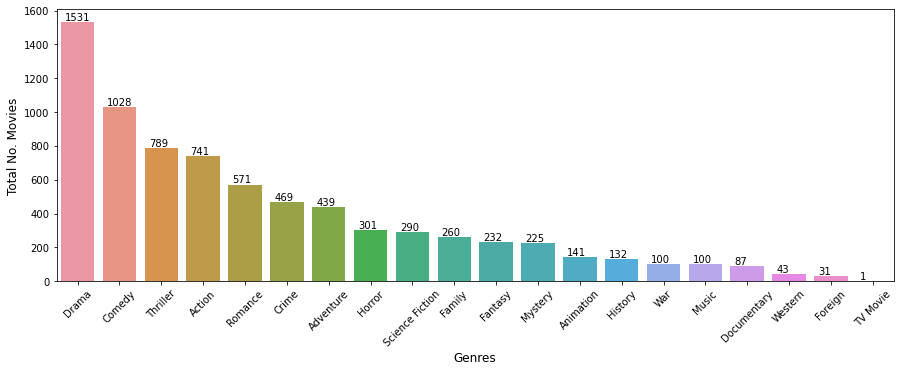

In [49]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45)
plt.ylabel('Total No. Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Popularity per Genre**

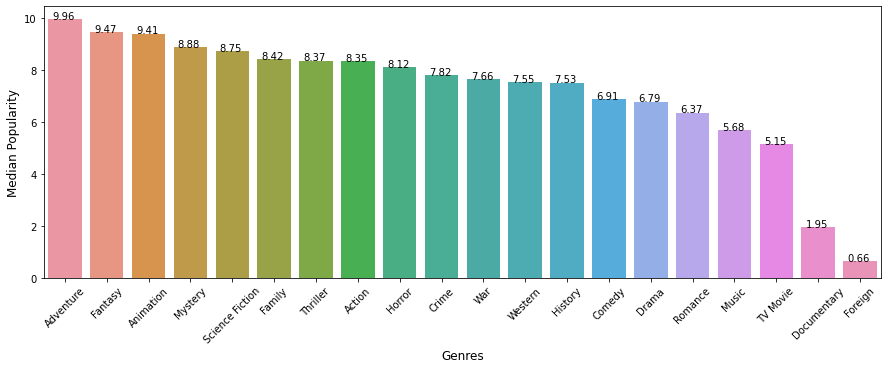

In [50]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_popularity', data=genres_info, order=genres_info.sort_values('median_popularity', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Popularity', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Rating per Genre**

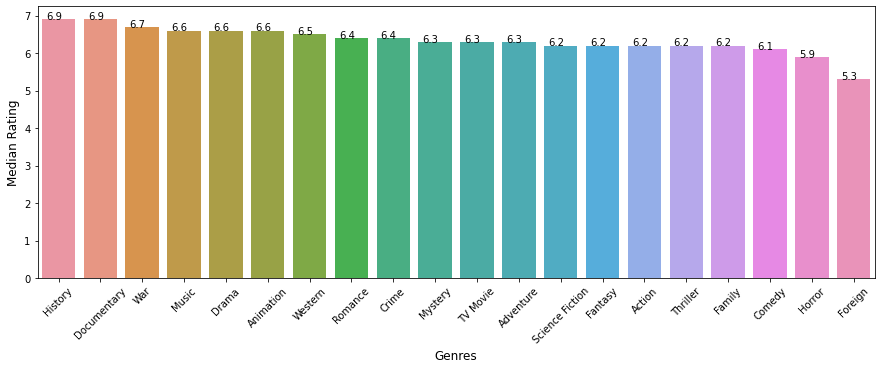

In [51]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_rating', data=genres_info, order=genres_info.sort_values('median_rating', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Rating', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Votes per Genre**

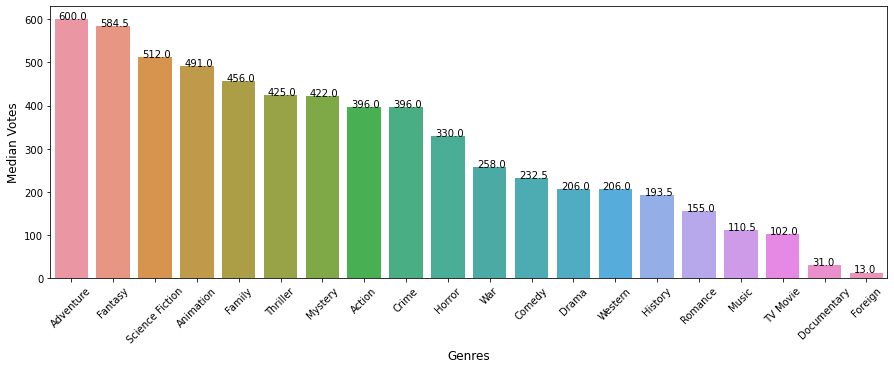

In [52]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_totalVotes', data=genres_info, order=genres_info.sort_values('median_totalVotes', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Votes', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## **Median Movie Revenue v Budget per Genre**

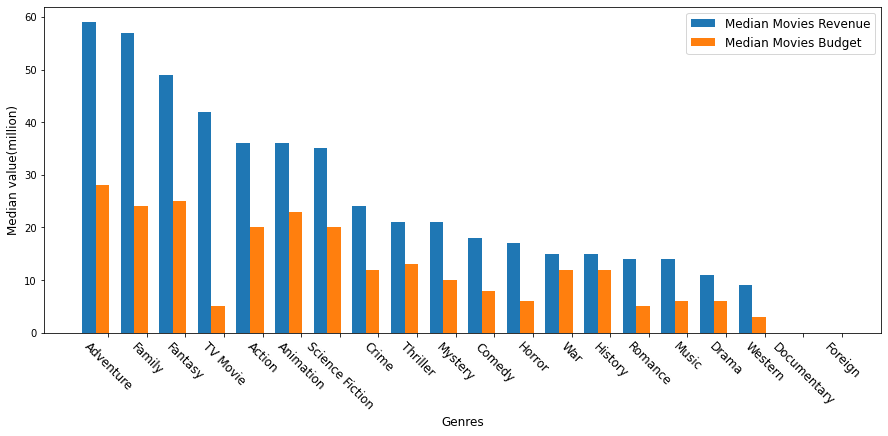

In [53]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('median_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['median_revenue(million)'], label="Median Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['median_budget(million)'], label="Median Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Median value(million)', fontsize=12)
plt.show()

## **Revenue Observations**

(31.5, 89.5)

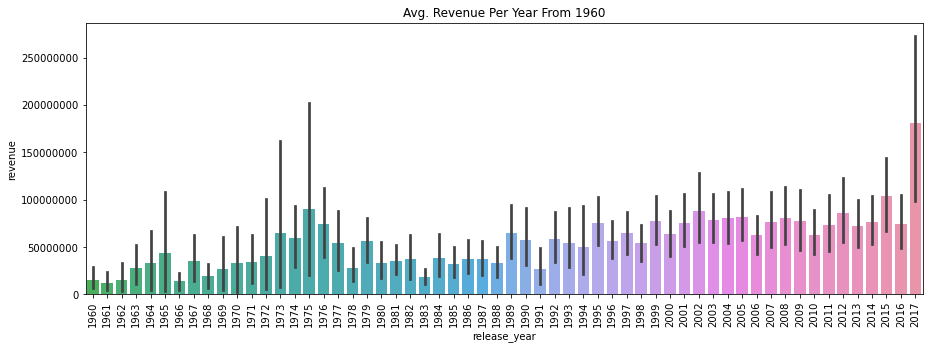

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_year', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Year From 1960')
ax.set_xlim(left=31.5)

Text(0.5, 1.0, 'Avg. Revenue Per Month')

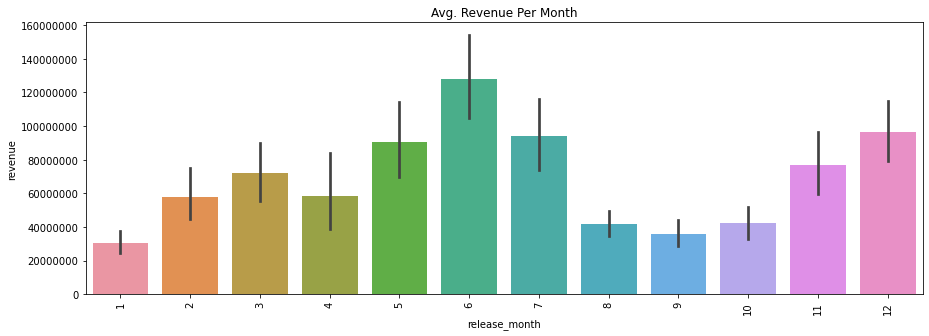

In [55]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_month', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Month')

Text(0.5, 1.0, 'Avg. Revenue for Each Day of Week')

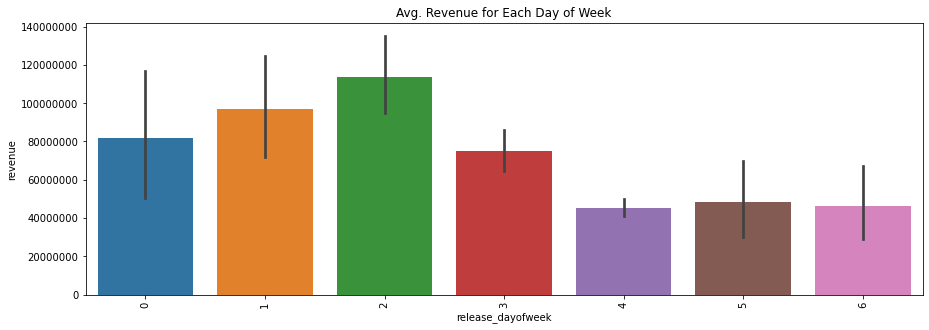

In [56]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_dayofweek', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue for Each Day of Week')

# Corelation Plot

In [57]:
data_explore.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes', 'sequel', 'release_year',
       'release_month', 'release_day', 'release_dayofweek', 'num_of_keywords',
       'all_keywords', 'keyword_woman director', 'keyword_independent film',
       'keyword_duringcreditsstinger', 'keyword_murder',
       'keyword_based on novel', 'keyword_violence', 'keyword_sport',
       'keyword_biography', 'keyword_aftercreditsstinger', 'keyword_dystopia',
       'num_of_languages', 'all_languages', 'language_English',
       'language_Français', 'language_Español', 'language_Deutsch',
       'language_Pусский'],
      dtype='object')

In [58]:
corr_df = data_explore[['imdb_id','title','genres','popularity','popularity2',
                        'production_companies','production_countries','status','cast', 'crew', 'budget','revenue',
                         'rating', 'totalVotes', 'sequel', 'release_year','runtime','num_of_keywords','num_of_languages']]

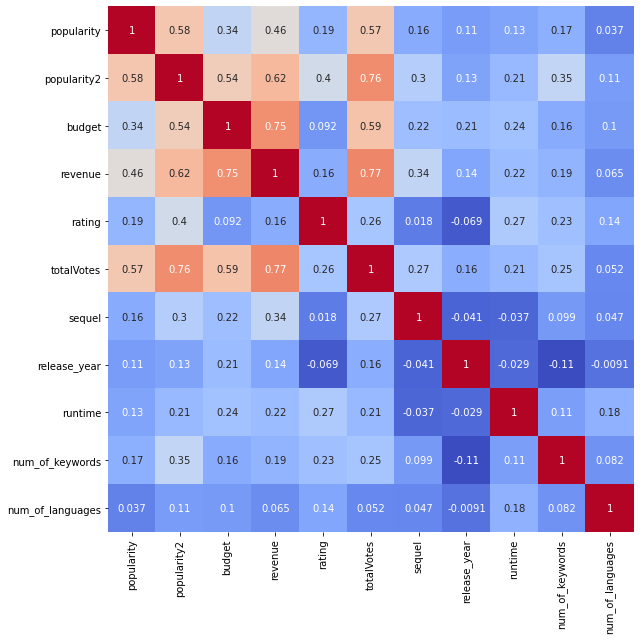

In [59]:
plt.figure(figsize=(15, 9))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False,cmap='coolwarm')
plt.tight_layout()

In [60]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue             1.000000
totalVotes          0.774167
budget              0.752965
popularity2         0.624727
popularity          0.461460
sequel              0.339425
runtime             0.216417
num_of_keywords     0.187721
rating              0.159692
release_year        0.137933
num_of_languages    0.064961
Name: revenue, dtype: float64

# Data Preprocessing

In [61]:
data_explore_genres.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes', 'sequel', 'release_year',
       'release_month', 'release_day', 'release_dayofweek', 'num_of_keywords',
       'all_keywords', 'keyword_woman director', 'keyword_independent film',
       'keyword_duringcreditsstinger', 'keyword_murder',
       'keyword_based on novel', 'keyword_violence', 'keyword_sport',
       'keyword_biography', 'keyword_aftercreditsstinger', 'keyword_dystopia',
       'num_of_languages', 'all_languages', 'language_English',
       'language_Français', 'language_Español', 'language_Deutsch',
       'language_Pусский', 'Comedy', 'Drama', 'Family', 'Romance', 'Thriller',
  

In [62]:
model_df = data_explore_genres[['totalVotes','budget','sequel','runtime','rating','release_year','Comedy', 'Drama', 
                                'Family', 'Romance', 'Thriller','Action', 'Animation', 'Adventure', 
                                'Horror','Music','Crime', 'Science Fiction', 'Mystery', 'Fantasy', 'War','History']]

model_df.head(2)

,totalVotes,budget,sequel,runtime,rating,release_year,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Music,Crime,Science Fiction,Mystery,Fantasy,War,History
0,482.0,14000000,1,93.0,5.0,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1528.0,40000000,1,113.0,6.4,2004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
model_df2 = data_explore_genres[['budget','runtime','rating','Comedy', 'Drama', 
                                'Family', 'Romance', 'Thriller','Action', 'Animation', 'Adventure', 
                                'Horror','Music','Crime', 'Science Fiction', 'Mystery', 'Fantasy', 'War','History',
                                 'language_English','language_Français', 'language_Español', 'language_Deutsch',
                                 'language_Pусский']]
model_df2.head(2)

,budget,runtime,rating,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Music,Crime,Science Fiction,Mystery,Fantasy,War,History,language_English,language_Français,language_Español,language_Deutsch,language_Pусский
0,14000000,93.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,40000000,113.0,6.4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
model_df3 = data_explore_genres[['budget','runtime','Comedy', 'Drama', 
                                'Family', 'Romance', 'Thriller','Action', 'Animation', 'Adventure', 
                                'Horror','Music','Crime', 'Science Fiction', 'Mystery', 'Fantasy', 'War','History',
                                 'language_English','language_Français', 'language_Español', 'language_Deutsch',
                                 'language_Pусский']]
model_df3.head(2)

,budget,runtime,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Music,Crime,Science Fiction,Mystery,Fantasy,War,History,language_English,language_Français,language_Español,language_Deutsch,language_Pусский
0,14000000,93.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,40000000,113.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
model_df3.shape

(3000, 23)

In [65]:
data_explore['popularity_rating'] = np.where(data_explore['popularity2'] >5, 1, 0)

In [83]:
data_explore['average_rating'] = np.where(data_explore['rating'] >5, 1, 0)

## **Modelling**

### **Multiple Linear Regression**

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [67]:
# Assign the data to X and y

X = model_df2
y = data_explore['revenue'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3000, 24) (3000, 1)


In [68]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [70]:
# Fit the model to the training data and calculate the scores for the training and testing data
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)
training_score = model.score(x_train_scaled, y_train_scaled)
testing_score = model.score(x_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6009776554133828
Testing Score: 0.5559045171467334


Text(0.5, 1.0, 'Residual Plot')

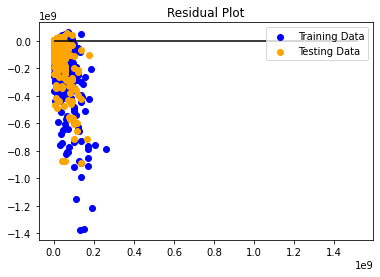

In [71]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [72]:
import pickle
pickle.dump(model, open('../Resources/model_mlr.pkl','wb'))

### **Support Vector Classification Machines**

https://scikit-learn.org/stable/modules/svm.html

In [93]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
import pandas as pd
import numpy as np
import os

In [94]:
model_df2.dtypes

budget                 int64
runtime              float64
rating               float64
Comedy                 int64
Drama                  int64
Family                 int64
Romance                int64
Thriller               int64
Action                 int64
Animation              int64
Adventure              int64
Horror                 int64
Music                  int64
Crime                  int64
Science Fiction        int64
Mystery                int64
Fantasy                int64
War                    int64
History                int64
language_English       int64
language_Français      int64
language_Español       int64
language_Deutsch       int64
language_Pусский       int64
dtype: object

In [95]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [96]:
# Assign the data to X and y

X = model_df3
y = data_explore['average_rating'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3000, 23) (3000, 1)


In [97]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [98]:
x_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
x_train_scaled = x_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

x_test_scaled = x_scaler.transform(X_test)
pickle.dump(x_scaler, open('../Resources/scaler.pkl','wb'))
y_test_scaled = y_scaler.transform(y_test)

In [99]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train_scaled, y_train)

SVC()

In [100]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(x_test_scaled, y_test))

Test Acc: 0.885


In [101]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.89      1.00      0.94       664

    accuracy                           0.89       750
   macro avg       0.44      0.50      0.47       750
weighted avg       0.78      0.89      0.83       750



In [102]:
import pickle
pickle.dump(model, open('../Resources/model_svc.pkl','wb'))